<a href="https://colab.research.google.com/github/LIONHOOD/OrdinaryDifferentialEquation_modeling/blob/main/ODE_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAPK cascade

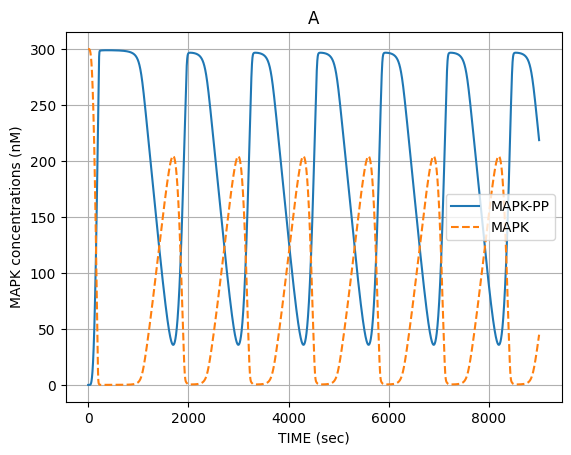

In [ ]:
# (A)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# parameters
V1, n, KL, K1 = 2.5, 1, 9, 10
V2, K2 = 0.25, 8
k3, K3 = 0.025, 15
k4, K4 = 0.025, 15
V5, K5 = 0.75, 15
V6, K6 = 0.75, 15
k7, K7 = 0.025, 15
k8, K8 = 0.025, 15
V9, K9 = 0.5, 15
V10, K10 = 0.5, 15

# ode function
def myode(U,t):
    mkkk = U[0]
    mkkk_p = U[1]
    mkk = U[2]
    mkk_p = U[3]
    mkk_pp = U[4]
    mapk = U[5]
    mapk_p = U[6]
    mapk_pp = U[7]

    v1 = V1*mkkk/((1+(mapk_pp/KL)**n)*(K1+mkkk))
    v2 = V2*mkkk_p/(K2+mkkk_p)
    v3 = k3*mkkk_p*mkk/(K3+mkk)
    v4 = k4*mkkk_p*mkk_p/(K4+mkk_p)
    v5 = V5*mkk_pp/(K5+mkk_pp)
    v6 = V6*mkk_p/(K6+mkk_p)
    v7 = k7*mkk_pp*mapk/(K7+mapk)
    v8 = k8*(mkk_pp)*mapk_p/(K8+mapk_p)
    v9 = V9*mapk_pp/(K9+mapk_pp)
    v10 = V10*mapk_p/(K10+mapk_p)

    return [v2-v1, v1-v2, v6-v3, v3+v5-v4-v6, v4-v5, v10-v7, v7+v9-v8-v10, v8-v9]
ts = np.linspace(0,9000,20000)
U0 = [100,0, 300, 0, 0, 300, 0, 0]
ys = odeint(myode, U0, ts)

mapk_pp_values = ys[:,7]
mapk_values = ys[:,5]

plt.plot(ts, mapk_pp_values, label='MAPK-PP')
plt.plot(ts, mapk_values, linestyle='--', label='MAPK')
plt.grid()
plt.title('A')
plt.legend(loc='best')
plt.xlabel('TIME (sec)')
plt.ylabel('MAPK concentrations (nM)');

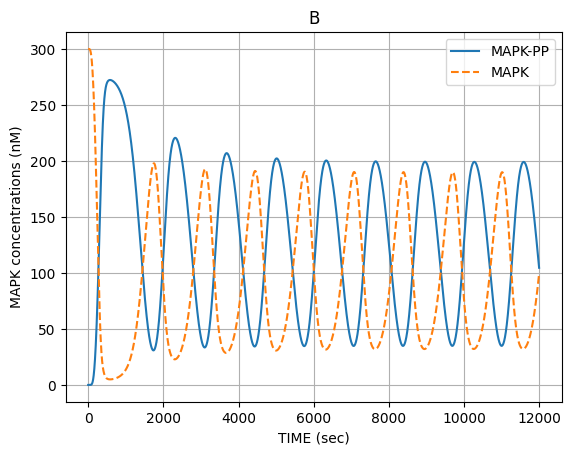

In [ ]:
# (B)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# parameters
V1, n, KL, K1 = 2.5, 2, 18, 50
V2, K2 = 0.25, 40
k3, K3 = 0.025, 100
k4, K4 = 0.025, 100
V5, K5 = 0.75, 100
V6, K6 = 0.75, 100
k7, K7 = 0.025, 100
k8, K8 = 0.025, 100
V9, K9 = 1.25, 100
V10, K10 = 1.25, 100

# ode function
def myode(U,t):
    mkkk = U[0]
    mkkk_p = U[1]
    mkk = U[2]
    mkk_p = U[3]
    mkk_pp = U[4]
    mapk = U[5]
    mapk_p = U[6]
    mapk_pp = U[7]

    v1 = V1*mkkk/((1+(mapk_pp/KL)**n)*(K1+mkkk))
    v2 = V2*mkkk_p/(K2+mkkk_p)
    v3 = k3*mkkk_p*mkk/(K3+mkk)
    v4 = k4*mkkk_p*mkk_p/(K4+mkk_p)
    v5 = V5*mkk_pp/(K5+mkk_pp)
    v6 = V6*mkk_p/(K6+mkk_p)
    v7 = k7*mkk_pp*mapk/(K7+mapk)
    v8 = k8*(mkk_pp)*mapk_p/(K8+mapk_p)
    v9 = V9*mapk_pp/(K9+mapk_pp)
    v10 = V10*mapk_p/(K10+mapk_p)

    return [v2-v1, v1-v2, v6-v3, v3+v5-v4-v6, v4-v5, v10-v7, v7+v9-v8-v10, v8-v9]
ts = np.linspace(0,12000,20000)
U0 = [100,0, 300, 0, 0, 300, 0, 0]
ys = odeint(myode, U0, ts)

mapk_pp_values = ys[:,7]
mapk_values = ys[:,5]

plt.plot(ts, mapk_pp_values, label='MAPK-PP')
plt.plot(ts, mapk_values, linestyle='--', label='MAPK')
plt.grid()
plt.title('B')
plt.legend(loc='best')
plt.xlabel('TIME (sec)')
plt.ylabel('MAPK concentrations (nM)');

# Inhibition 반응 실험

## 1. Competitive inhibition
*사용된 모든 수식은 강의자료에 기술되어 있는 것을 참고하였습니다. (코드의 주석 부분을 통해 부가 설명)*

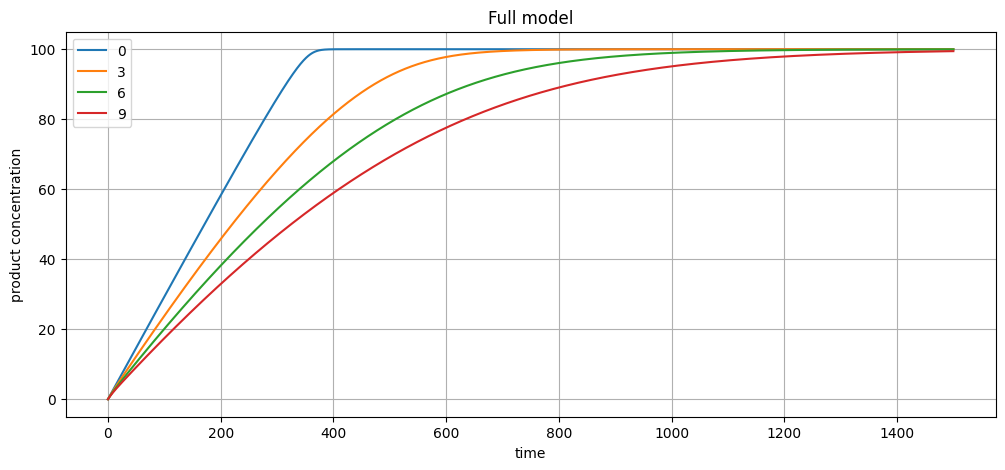

In [ ]:
# (1) Full model 구현 및 Inhibitor 농도에 따른 반응속도 변화 관찰
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 매개변수
k1 = 0.2
k2 = 0.1
k3 = 0.3
k4 = 0.4
k5 = 0.1

# Full model 미분방정식 정의 (강의자료의 Competitive inhibition 수식 참고)
def myode(U,t):
    s,e,p,i,c1,c2 = U
    return [-k1*s*e+k2*c1, (k2+k3)*c1-k1*s*e-k4*e*i+k5*c2, k3*c1, k5*c2-k4*e*i, k1*s*e-(k2+k3)*c1, k4*e*i-k5*c2]

# 시간 범위
ts = np.linspace(0,1500,20000)

# i : Inhibitor 농도 ; 초깃값을 바꾸면서 실험
plt.figure(figsize=(12,5))
for I in range(0,10,3):
    U0 = [100,1,0,I,0,0] # s, e, p, i, c1, c2 초깃값
    Us = odeint(myode, U0, ts)
    Ps = Us[:,2] # p : Product 농도
    plt.plot(ts, Ps, label=I)
plt.grid()
plt.legend(loc='best') # 범례 항목으로 Inhibitor 농도의 초깃값 구분
plt.title('Full model')
plt.xlabel('time')
plt.ylabel('product concentration');

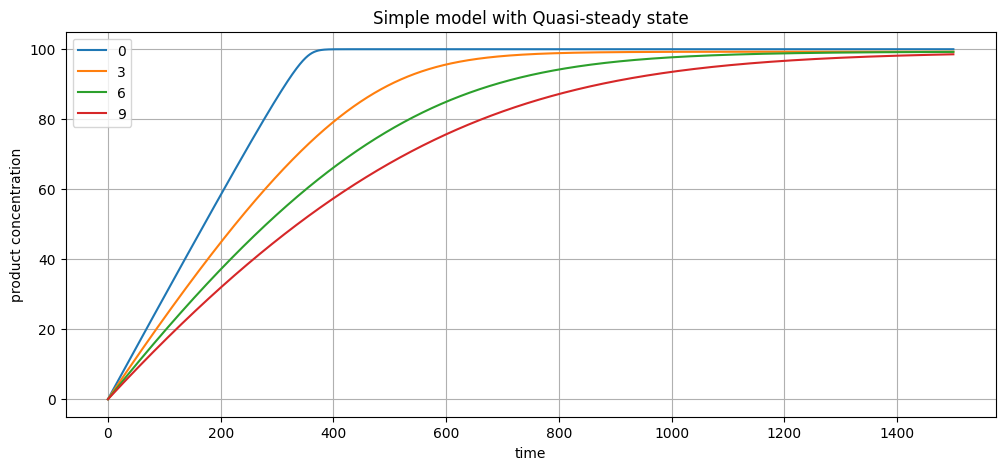

In [ ]:
# (2) Quasi-steady state 가정 하에 Simple model 구현 및 비교
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 문제 (1)과 동일한 매개변수 설정
k1 = 0.2
k2 = 0.1
k3 = 0.3
k4 = 0.4
k5 = 0.1

# 강의자료의 Simple model 참고하여 수식 구현에 필요한 매개변수 Km, Ki 정의
Km = (k2+k3)/k1
Ki = k5/k4

# e0 : Enzyme 초기 농도 저장 ; Simple model의 매개변수로 사용됨
e0 = 1

# Simple model 미분방정식 정의 (강의자료의 Competitive inhibition ; Quasi-steady state 수식 참고)
# d(c1)/dt = d(c2)/dt = 0
def myode(U,t):
    s,e,p,i = U
    # c1, c2 수식 참고 ; Complexes at instantaneous equilibrium
    c1 = (Ki*e0*s)/(Km*i+Ki*s+Km*Ki)
    c2 = (Km*e0*i)/(Km*i+Ki*s+Km*Ki)
    return [-k1*s*e+k2*c1, (k2+k3)*c1-k1*s*e-k4*e*i+k5*c2, k3*c1, k5*c2-k4*e*i]

# 시간 범위
ts = np.linspace(0,1500,20000)

# i : Inhibitor 농도 ; 초깃값을 바꾸면서 실험
plt.figure(figsize=(12,5))
for I in range(0,10,3):
    U0 = [100,1,0,I] # s, e, p, i 초깃값 ; s : Substrate 농도 >> e : Enzyme 농도 (Quasi-steady state)
    Us = odeint(myode, U0, ts)
    Ps = Us[:,2] # p : Product 농도
    plt.plot(ts, Ps, label=I)
plt.grid()
plt.legend(loc='best') # 범례 항목으로 Inhibitor 농도의 초깃값 구분
plt.title('Simple model with Quasi-steady state')
plt.xlabel('time')
plt.ylabel('product concentration');

**<Competitive inhibition 분석 결과>**  
1. Inhibitor 의 초기 농도를 0, 3, 6, 9로 변화시키며 실험한 결과, <ins>Inhibitor 의 초기 농도가 증가</ins>할수록 <ins>동일한 Product 농도에 도달하기 위해 소요되는 시간도 증가</ins>하였다.
2. Competitive inhibition 이 존재하는 실험에서도 inhibition 이 없는, 즉, Inhibitor 의 초기 농도가 0 인 반응에서의 <ins>최대 Product 농도까지 결국에는 모두 도달</ins> 가능하였다.
3. [Substrate] >> [Enzyme] 인 상황에서 가정한 Complexes 의 동시 평형, 즉, Quasi-steady state 에 대하여 계산되는 <ins>Simple model 의 수식이 Full model 을 사용한 결과에 잘 근사하여, 반응 분석을 단순화하는 데에 기여함</ins>을 확인하였다.

## 2. Allosteric inhibition
*사용된 모든 수식은 강의자료의 아래 Reaction scheme 을 토대로 직접 계산하였습니다. (코드의 주석 부분을 통해 부가 설명)*

>**Reaction scheme**

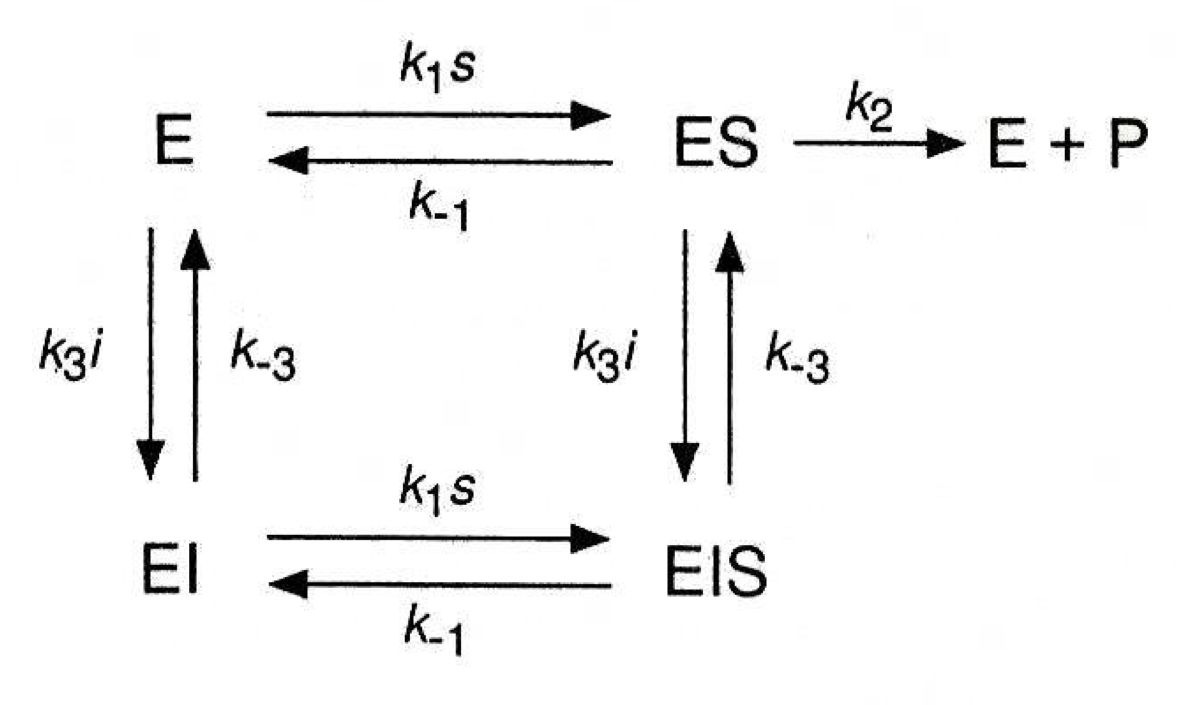

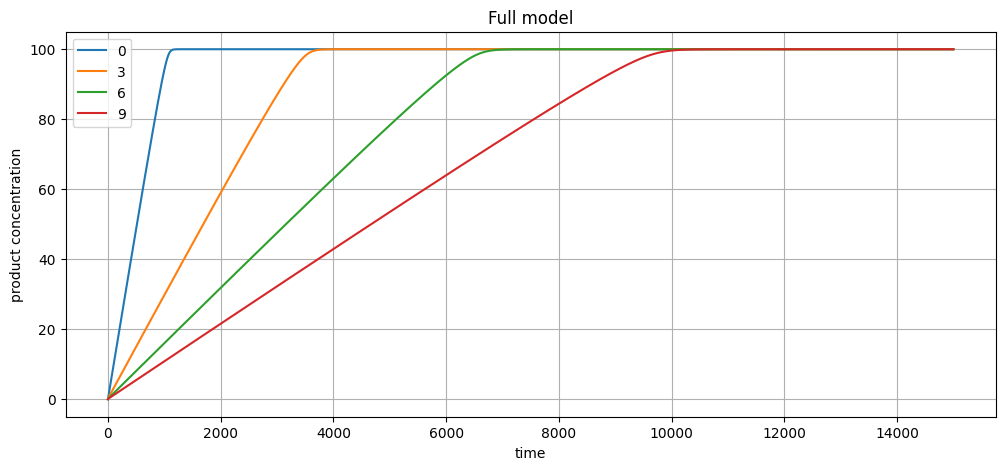

In [ ]:
# (1) Full model 구현 및 Inhibitor 농도에 따른 반응속도 변화 관찰
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 매개변수 ; notation '-' 는 '_'로 표현
k1, k_1, k2, k3, k_3 = 0.1, 0.1, 0.1, 0.1, 0.1

# Simple model 미분방정식 정의 (Allosteric inhibition 수식)
def myode(U,t):
    s,e,p,i,x,y,z = U
    ds = -k1*s*e + k_1*x - k1*s*y + k_1*z
    de = -k1*s*e + k_1*x - k3*e*i + k_3*y + k2*x
    dp = k2*x
    di = -k3*e*i + k_3*y - k3*x*i + k_3*z
    dx = k1*s*e - k_1*x - k2*x + k_3*z - k3*x*i
    dy = -k1*s*y + k_1*z - k_3*y + k3*e*i
    dz = k1*s*y - k_1*z + k3*x*i - k_3*z
    return [ds, de, dp, di, dx, dy, dz]

# 시간 범위
ts = np.linspace(0,15000,20000)

# i : Inhibitor 농도 ; 초깃값을 바꾸면서 실험
plt.figure(figsize=(12,5))
for I in range(0,10,3):
    U0 = [100,1,0,I,0,0,0] # s, e, p, i, x, y, z 초깃값
    Us = odeint(myode, U0, ts)
    Ps = Us[:,2] # p : Product 농도
    plt.plot(ts, Ps, label=I)
plt.grid()
plt.legend(loc='best') # 범례 항목으로 Inhibitor 농도의 초깃값 구분
plt.title('Full model')
plt.xlabel('time')
plt.ylabel('product concentration');

>**MATLAB** 을 이용한 Quasi-steady state 수식 계산 (연립방정식)  
(단, 매개변수 조건은 모두 0.1로 동일하므로 미리 약분하여 계산을 단순화)

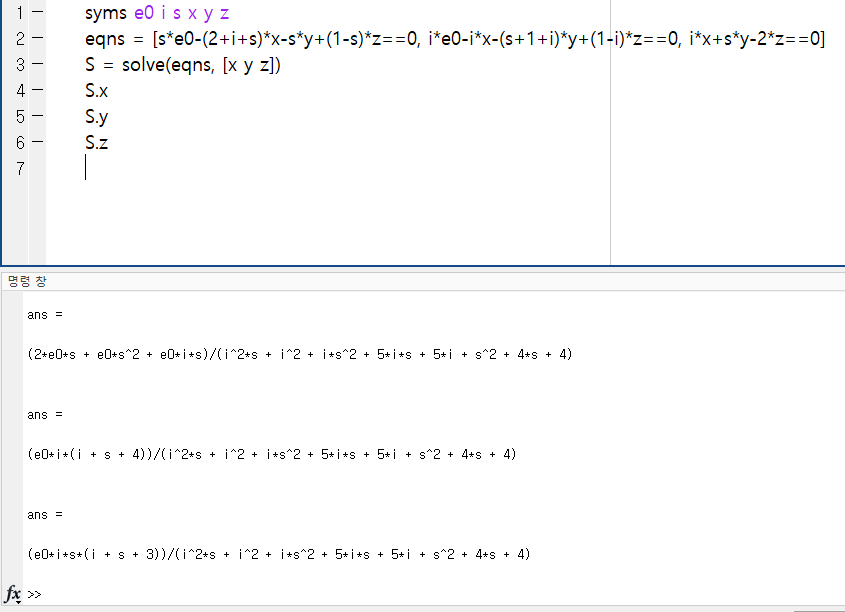

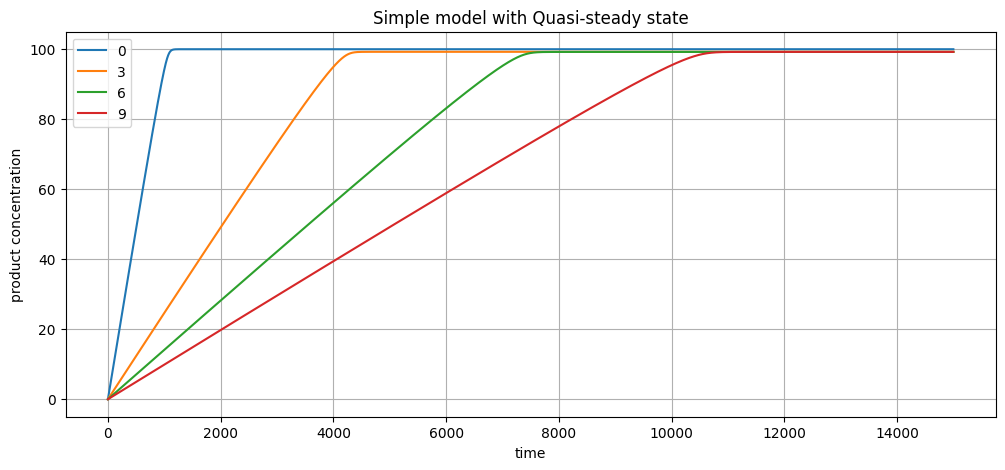

In [ ]:
# (2) Quasi-steady state 가정 하에 Simple model 구현 및 비교
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 문제 (1)과 동일한 매개변수 설정
k1, k_1, k2, k3, k_3 = 0.1, 0.1, 0.1, 0.1, 0.1

# 수식 구현에 필요한 매개변수 Ks, Ki 정의
Ks = k_1/k1
Ki = k_3/k3

# e0 : Enzyme 초기 농도 저장 ; Simple model의 매개변수로 사용됨
e0 = 1

# Simple model 미분방정식 정의 (Allosteric inhibition ; Quasi-steady state 수식)
# dx/dt = dy/dt = dz/dt = 0
def myode(U,t):
    s,e,p,i = U

    # Complexes at instantaneous equilibrium
    # 보다 강력한 가정 하에 성립하는 Simple model
    # x = (e0*Ki*s) / ((Ki+i)*(Ks+s))
    # y = (e0*Ks*i) / ((Ki+i)*(Ks+s))
    # z = (i*x+s*y) / 2

    # MATLAB 연립방정식 해에 의한 Simple model
    x = (2*e0*s + e0*s**2 + e0*i*s) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)
    y = (e0*i*(i+s+4)) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)
    z = (e0*i*s*(i+s+3)) / (i**2*s + i**2 + i*s**2 + 5*i*s + 5*i + s**2 + 4*s + 4)

    ds = -k1*s*e + k_1*x - k1*s*y + k_1*z
    de = -k1*s*e + k_1*x - k3*e*i + k_3*y + k2*x
    dp = k2*x
    di = -k3*e*i + k_3*y - k3*x*i + k_3*z
    return [ds, de, dp, di]

# 시간 범위
ts = np.linspace(0,15000,20000)

# i : Inhibitor 농도 ; 초깃값을 바꾸면서 실험
plt.figure(figsize=(12,5))
for I in range(0,10,3):
    U0 = [100,1,0,I] # s, e, p, i 초깃값
    Us = odeint(myode, U0, ts)
    Ps = Us[:,2] # p : Product 농도
    plt.plot(ts, Ps, label=I)
plt.grid()
plt.legend(loc='best') # 범례 항목으로 Inhibitor 농도의 초깃값 구분
plt.title('Simple model with Quasi-steady state')
plt.xlabel('time')
plt.ylabel('product concentration');

**<Allosteric inhibition 분석 결과>**  
1. Inhibitor 의 초기 농도를 0, 3, 6, 9로 변화시키며 실험한 결과, <ins>Inhibitor 의 초기 농도가 증가</ins>할수록 <ins>동일한 Product 농도에 도달하기 위해 소요되는 시간도 증가</ins>하였다.
2. Allosteric inhibition 이 존재하는 실험에서도 inhibition 이 없는, 즉, Inhibitor 의 초기 농도가 0 인 반응에서의 <ins>최대 Product 농도까지 결국에는 모두 도달</ins> 가능하였다.
3. Competitive inhibition 에 비해 Allosteric inhibition 에서 반응 소요 시간이 눈에 띄게 증가하는 것(time 축의 스케일 차이)으로부터, <ins>Allosteric inhibition 에서 최대 반응속도가 감소</ins>하는 것을 실험적으로 확인하였다.
4. [Substrate] >> [Enzyme] 인 상황에서 가정한 Complexes 의 동시 평형, 즉, Quasi-steady state 에 대하여 계산되는 <ins>Simple model 의 수식이 Full model 을 사용한 결과에 잘 근사하여, 반응 분석을 단순화하는 데에 기여함</ins>을 확인하였다.

# ODE modeling 논문 구현

## 1. 개요
paper : [EFFECT OF NEGATIVE FEEDBACK LOOP WITH NRF1
AND MIR-378 OF NONALCOHOLIC FATTY LIVER DISEASE:
A MATHEMATICAL MODELING APPROACH](https://koreascience.kr/article/JAKO202016357498318.pdf)

**비알코올성 지방간(NAFLD)** : 지방이 알코올 없이 간에 축적되는 지방간의 일종

**Nrf1**과 **miR-378** : 지방 축적에 관여하는 유전자
- **음성 피드백 루프(negative feedback loop)** : 유전자 발현의 상호 억제
- **지방산 산화(fatty acid oxidation ; FAO)** : ATP 생성을 위한 지방산 대사 ; <ins>간에서 지방 소비 촉진
 - Nrf1 : <ins>FAO 활성화
 - miR-378 : <ins>FAO 비활성화

>*Nrf1과 miR-378의 음성 피드백 루프에 의한 NAFLD 제어 구조*  
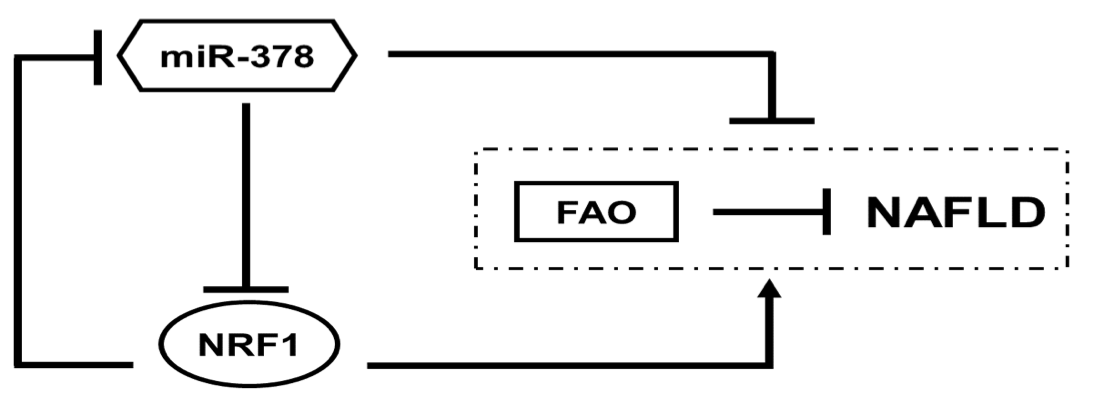

**NAFLD model** : 음성 피드백 루프의 상미분방정식 시스템에 의한 모델링

**분기(bifurcation) 시뮬레이션** : 두 유전자의 평형 및 안정성 관찰로부터 중요한 <ins>매개변수 값의 범위 확인
- 질병(NAFLD)과 정상(normal) 상태의 전환에 대한 threshold 확인

## 2. NAFLD model 구현

### 1. 수식 정리

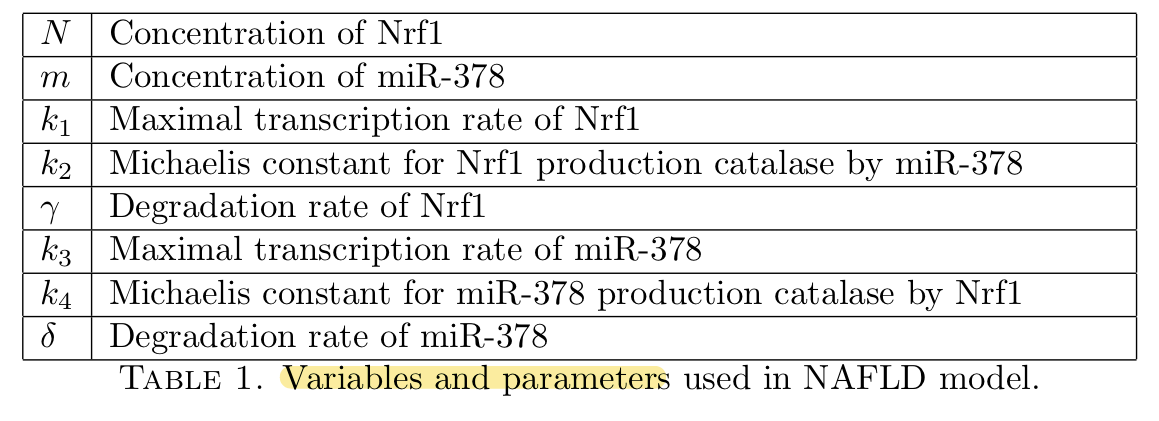

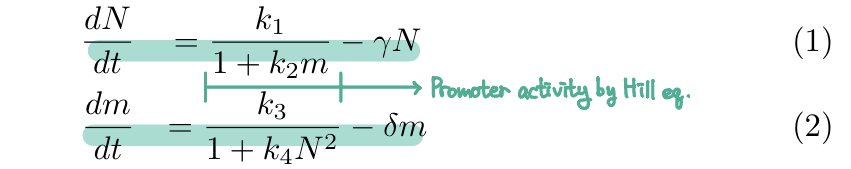

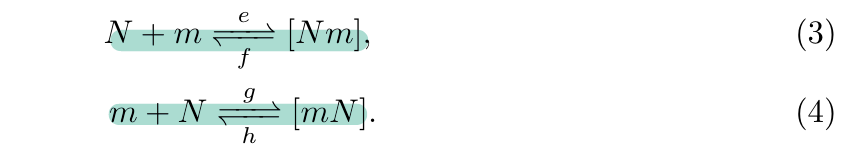

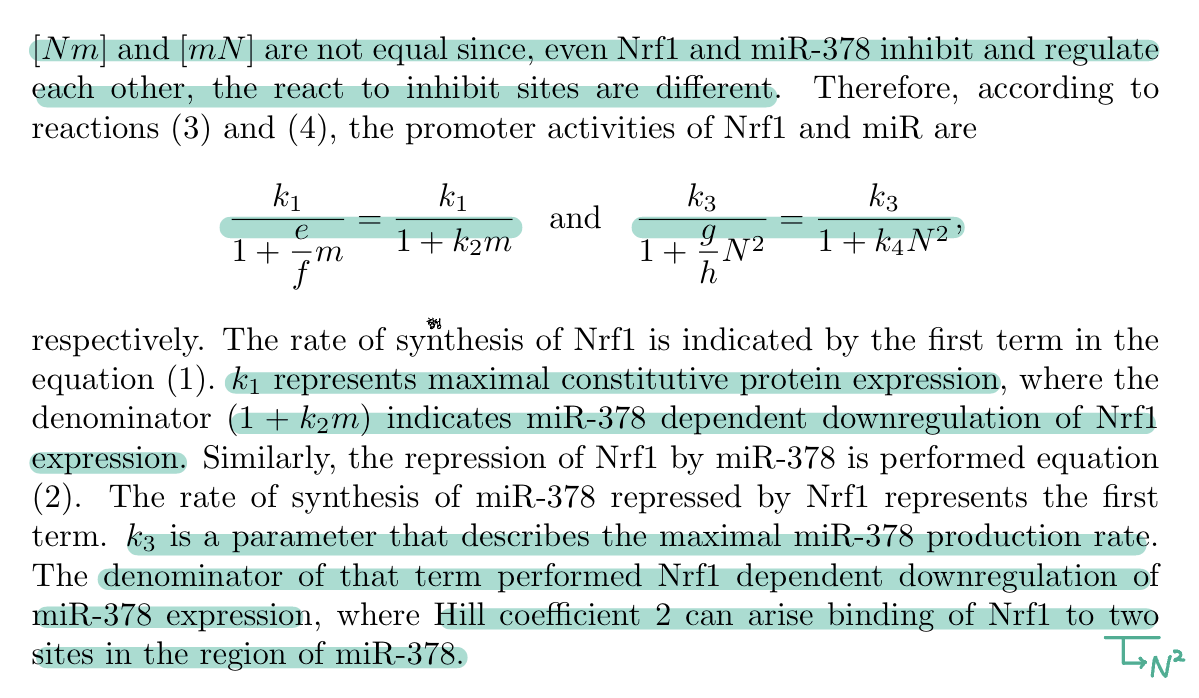

### 2. 논문의 실험 및 결과

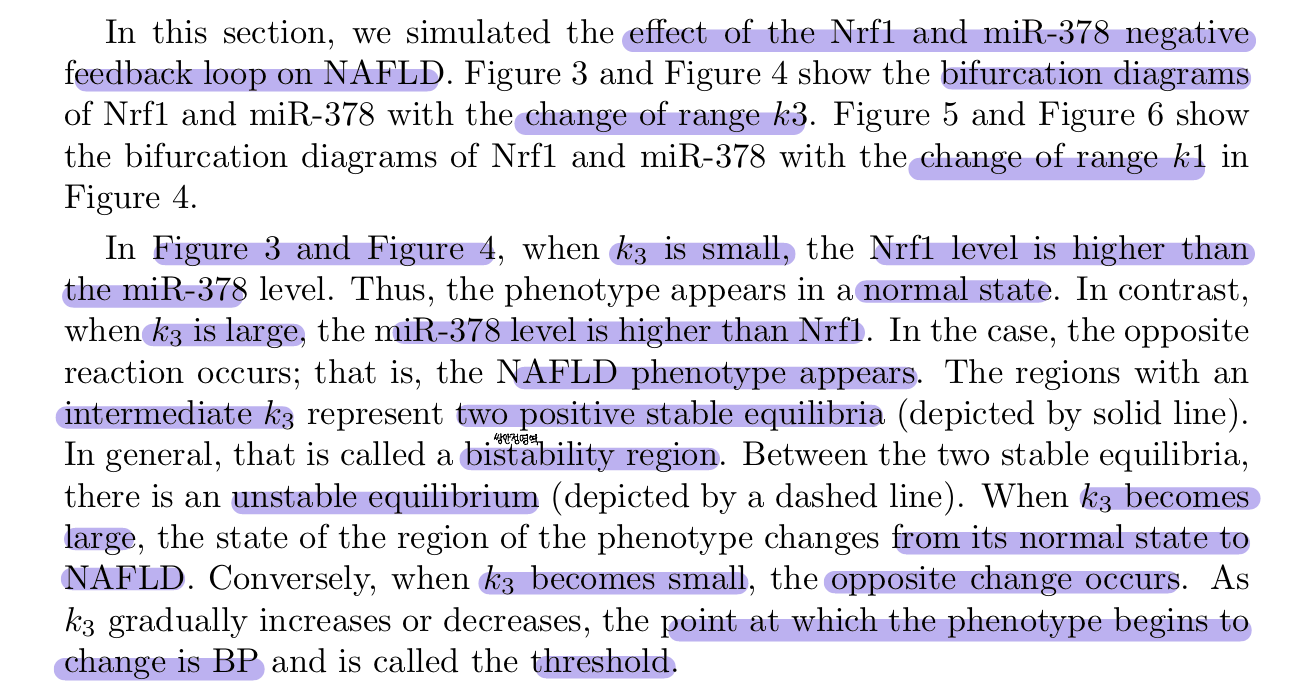

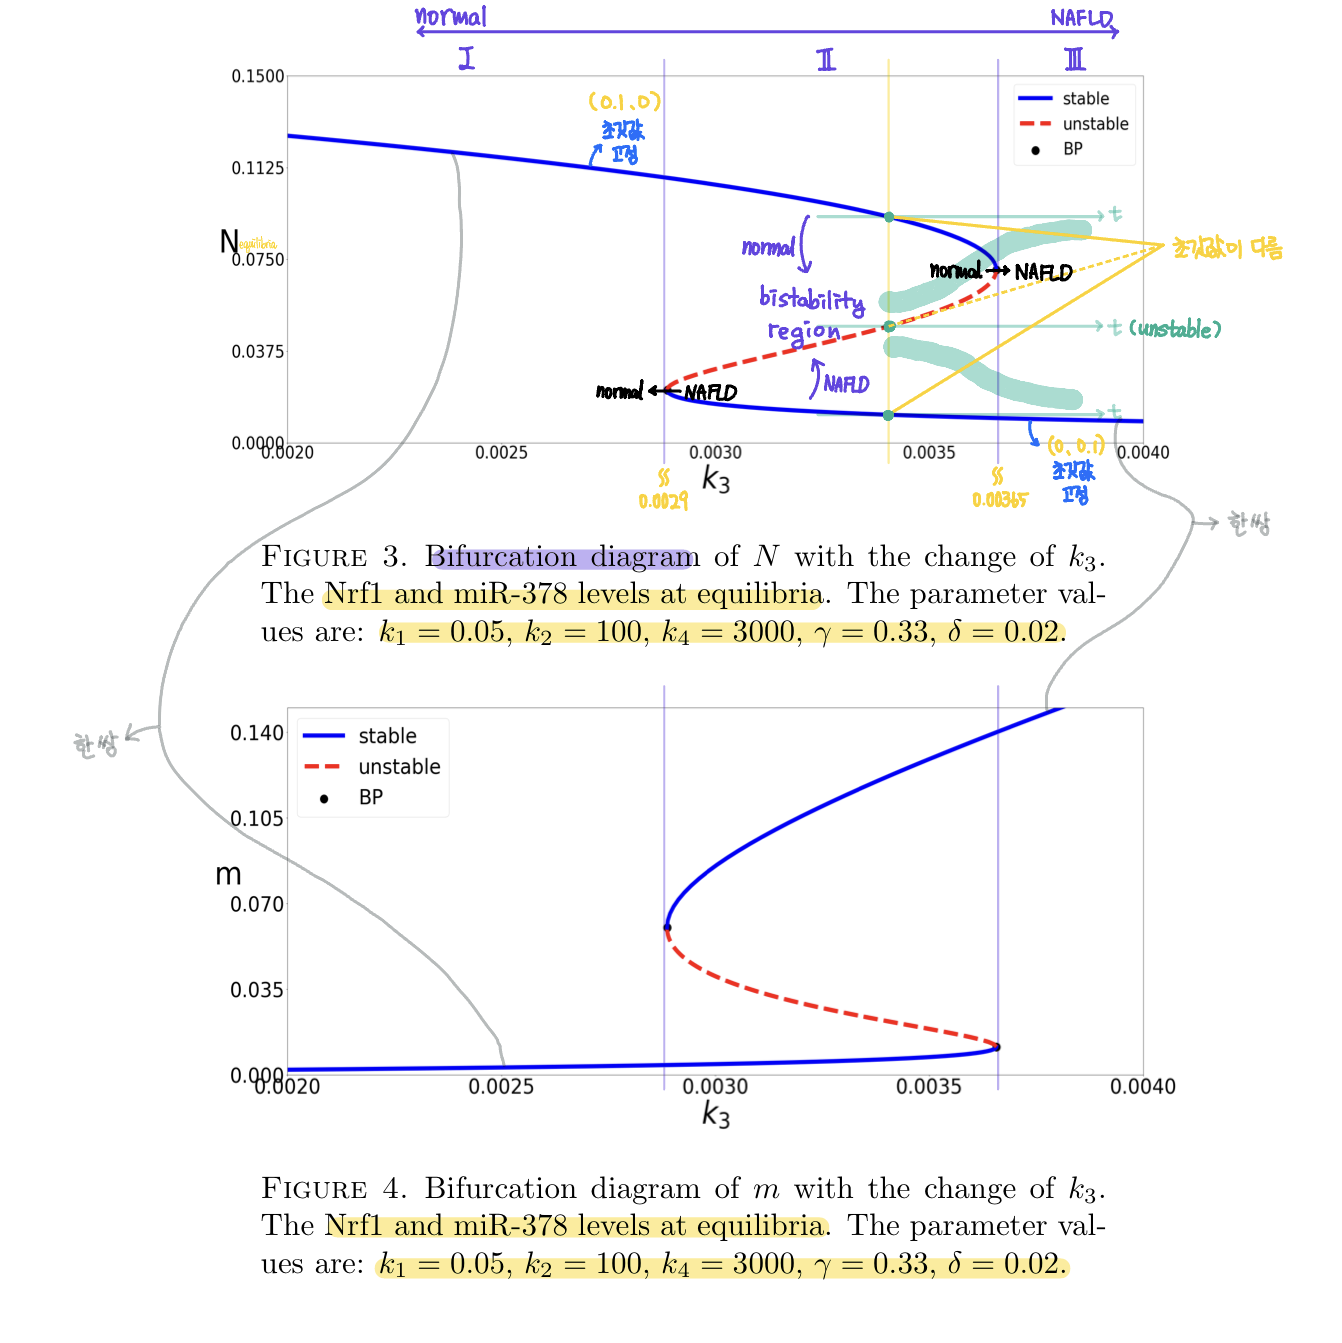

### 3. 미분방정식 실험 재현

phenotype에 따른 (N, m)에 대한 초깃값의 대표 형태
- N > m : (0.1, 0) → normal
- N < m : (0, 0.1) → NAFLD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

#### k3 = 0.0025
- 초깃값에 관계없이 오직 하나의 normal 안정 평형 존재

Equilibrium : (N, m) = (0.11664979190786245, 0.0029888917105679027)


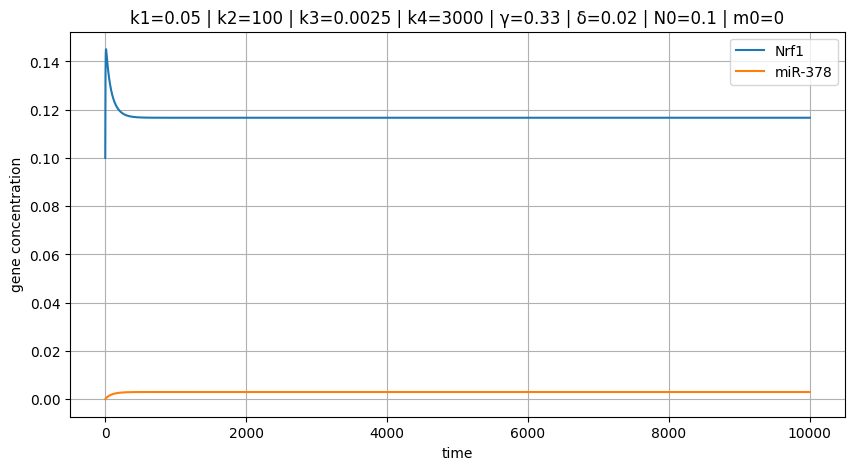

In [ ]:
# 초깃값 : normal
U0 = [0.1,0]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0025, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : normal

Equilibrium : (N, m) = (0.1166497919077673, 0.002988891710578153)


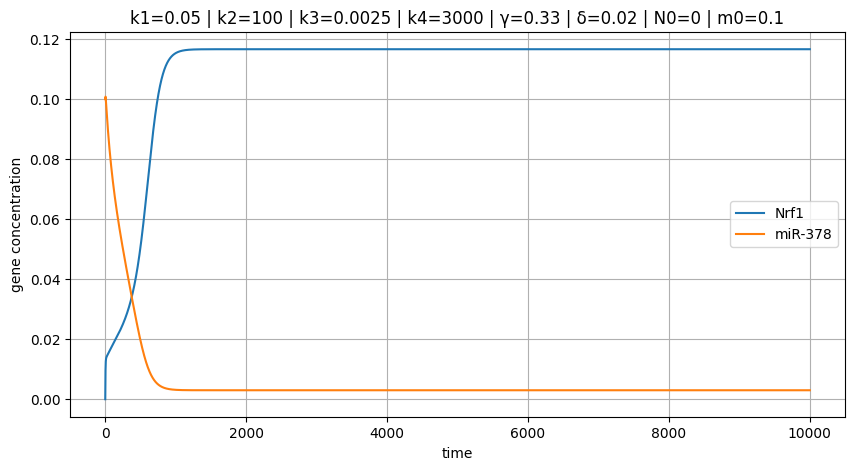

In [ ]:
# 초깃값 : NAFLD
U0 = [0,0.1]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0025, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : normal

#### k3 = 0.0030
- 초깃값에 따라 하나의 normal 안정 평형과 하나의 NAFLD 안정 평형 존재

Equilibrium : (N, m) = (0.10549978147164131, 0.004361655484172132)


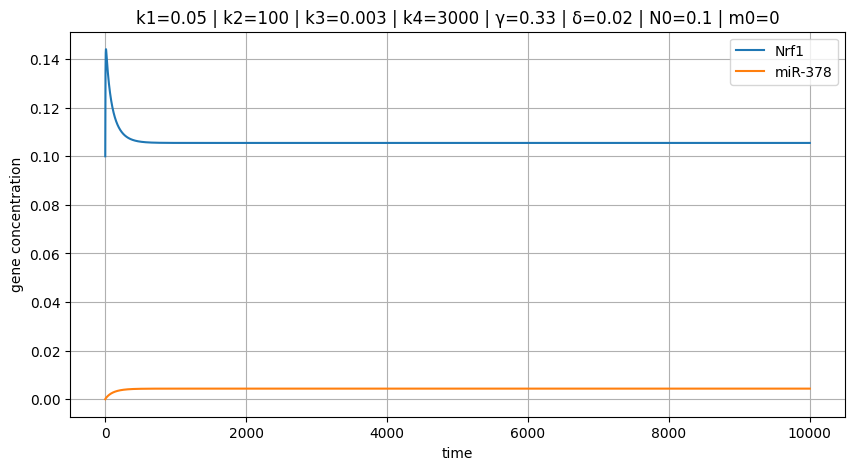

In [ ]:
# 초깃값 : normal
U0 = [0.1,0]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0030, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : normal

Equilibrium : (N, m) = (0.01589208797978756, 0.08533999037872433)


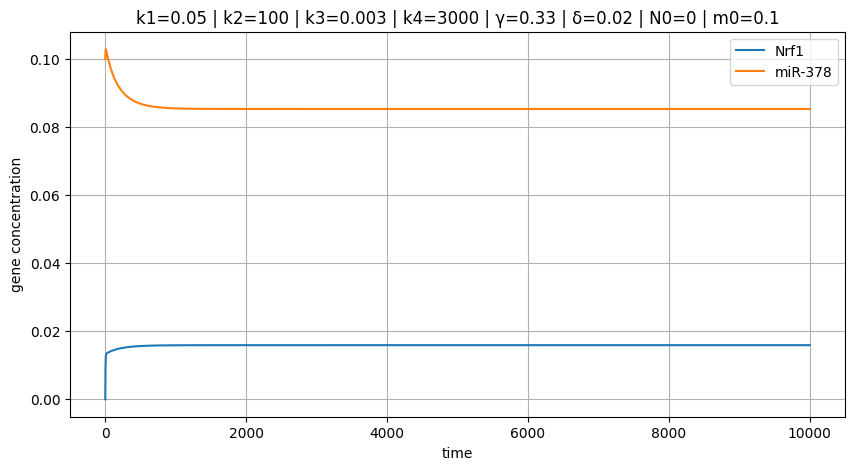

In [ ]:
# 초깃값 : NAFLD
U0 = [0,0.1]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0030, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : NAFLD

#### k3 = 0.0035
- 초깃값에 따라 하나의 normal 안정 평형과 하나의 NAFLD 안정 평형 존재

Equilibrium : (N, m) = (0.08788958620857551, 0.007239260994162315)


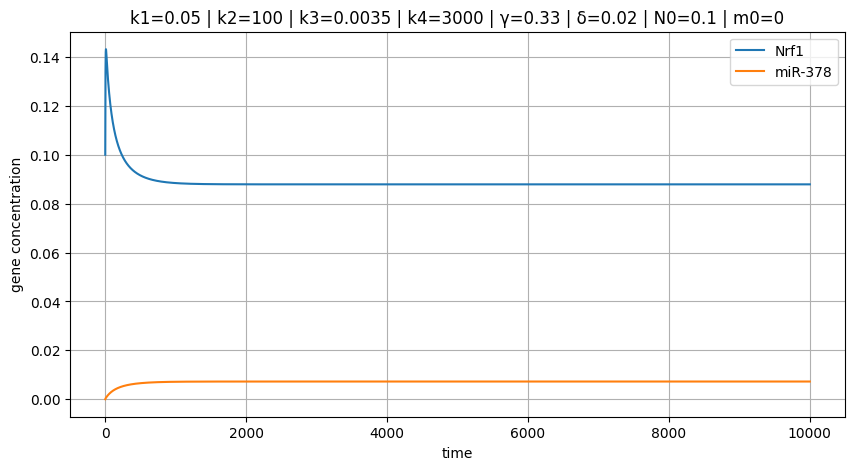

In [ ]:
# 초깃값 : normal
U0 = [0.1,0]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0035, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : normal

Equilibrium : (N, m) = (0.010898406955622088, 0.12902504479059132)


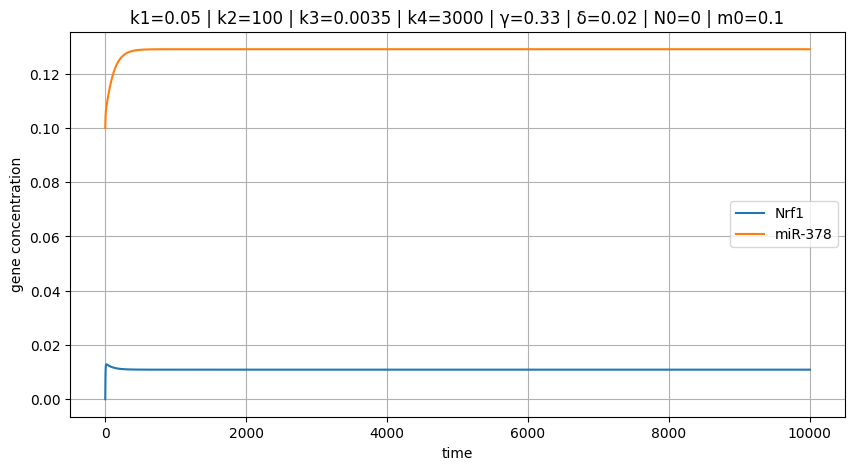

In [ ]:
# 초깃값 : NAFLD
U0 = [0,0.1]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0035, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : NAFLD

##### unstable equilibrium의 존재성 확인 예시

In [ ]:
import numpy as np
np.linspace(0,0.1,51)

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 , 0.022, 0.024, 0.026, 0.028, 0.03 , 0.032, 0.034,
       0.036, 0.038, 0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052,
       0.054, 0.056, 0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 ,
       0.072, 0.074, 0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088,
       0.09 , 0.092, 0.094, 0.096, 0.098, 0.1  ])

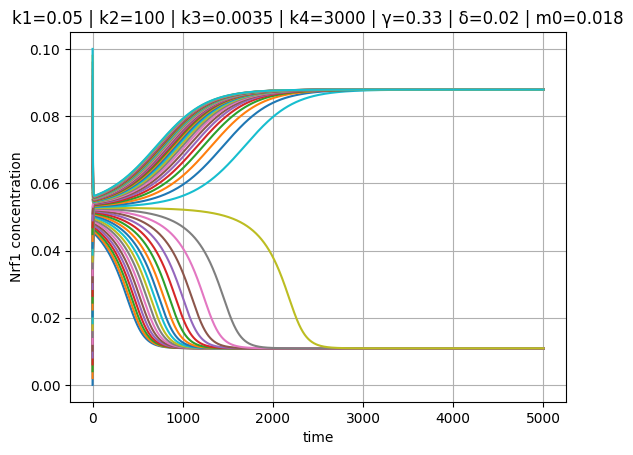

In [ ]:
# 초깃값에서 N 변화, m 고정
N0s = np.linspace(0,0.1,50)

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0035, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 5000, 50000)


for N0 in N0s:
    U0 = [N0, 0.018]
    # 미분방정식 해
    Us = odeint(nafld_ode, U0, ts)

    # 시간에 따른 Nrf1의 농도 변화 관찰
    plt.plot(ts, Us[:,0], label=N0)

plt.xlabel('time')
plt.ylabel('Nrf1 concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | m0={U0[1]}')
plt.grid();

#### k3 = 0.0040
- 초깃값에 관계없이 오직 하나의 NAFLD 안정 평형 존재

Equilibrium : (N, m) = (0.008790565038752498, 0.16236110635081794)


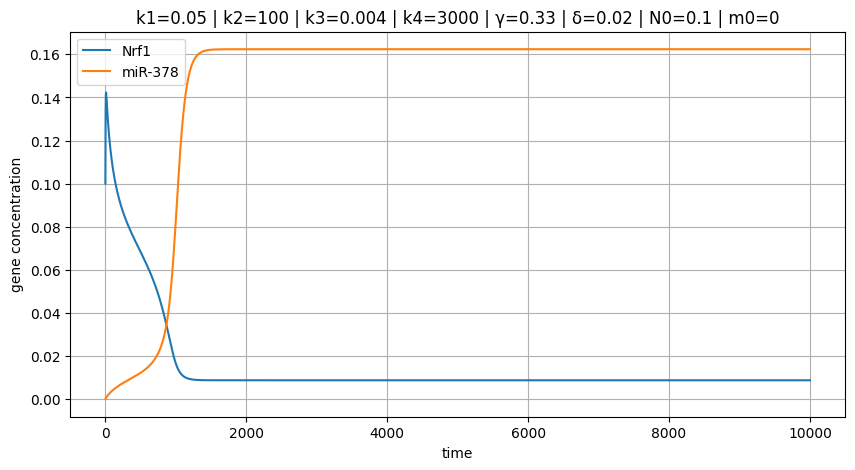

In [ ]:
# 초깃값 : normal
U0 = [0.1,0]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0040, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : NAFLD

Equilibrium : (N, m) = (0.00879056498160093, 0.1623611074285464)


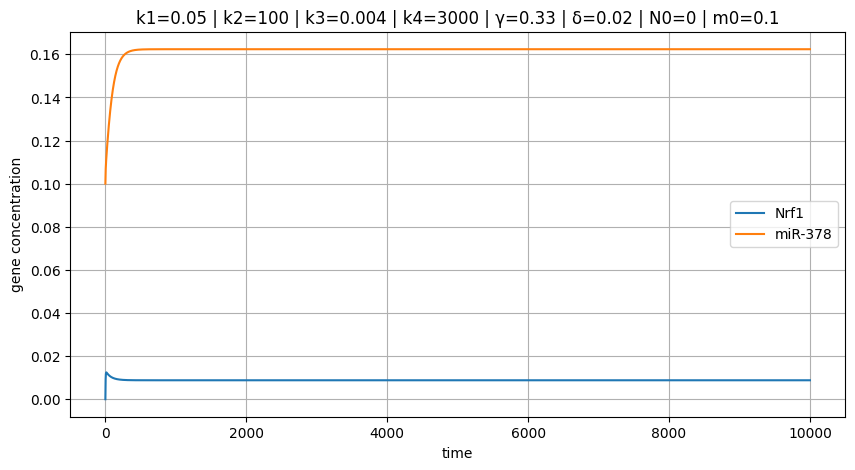

In [ ]:
# 초깃값 : NAFLD
U0 = [0,0.1]

# 매개변수
k1, k2, k3, k4 = 0.05, 100, 0.0040, 3000
γ, δ = 0.33, 0.02

# 미분방정식
def nafld_ode(U, t):
    N, m = U
    dN = k1 / (1+k2*m) - γ*N
    dm = k3 / (1+k4*(N**2)) - δ*m
    return [dN, dm]

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# 미분방정식 해
Us = odeint(nafld_ode, U0, ts)

# 시간에 따른 두 유전자의 농도 변화 관찰
plt.figure(figsize=(10,5))
plt.plot(ts, Us[:,0], label='Nrf1')
plt.plot(ts, Us[:,1], label='miR-378')
plt.xlabel('time')
plt.ylabel('gene concentration')
plt.title(f'k1={k1} | k2={k2} | k3={k3} | k4={k4} | γ={γ} | δ={δ} | N0={U0[0]} | m0={U0[1]}')
plt.grid()
plt.legend(loc='best');

print('Equilibrium : (N, m) =', tuple(Us[-1,:]))
# 안정 평형 : NAFLD

#### 안정 평형 상태의 phenotype 변화에 대한 k3의 threshold 탐색
→ 병리학적 효용 : Nrf1, miR-378의 최대 transription rate인 k1, k3를 통한 NAFLD 연구

In [ ]:
# k3 탐색 범위
np.linspace(20,40,81)/10000

array([0.002   , 0.002025, 0.00205 , 0.002075, 0.0021  , 0.002125,
       0.00215 , 0.002175, 0.0022  , 0.002225, 0.00225 , 0.002275,
       0.0023  , 0.002325, 0.00235 , 0.002375, 0.0024  , 0.002425,
       0.00245 , 0.002475, 0.0025  , 0.002525, 0.00255 , 0.002575,
       0.0026  , 0.002625, 0.00265 , 0.002675, 0.0027  , 0.002725,
       0.00275 , 0.002775, 0.0028  , 0.002825, 0.00285 , 0.002875,
       0.0029  , 0.002925, 0.00295 , 0.002975, 0.003   , 0.003025,
       0.00305 , 0.003075, 0.0031  , 0.003125, 0.00315 , 0.003175,
       0.0032  , 0.003225, 0.00325 , 0.003275, 0.0033  , 0.003325,
       0.00335 , 0.003375, 0.0034  , 0.003425, 0.00345 , 0.003475,
       0.0035  , 0.003525, 0.00355 , 0.003575, 0.0036  , 0.003625,
       0.00365 , 0.003675, 0.0037  , 0.003725, 0.00375 , 0.003775,
       0.0038  , 0.003825, 0.00385 , 0.003875, 0.0039  , 0.003925,
       0.00395 , 0.003975, 0.004   ])

In [ ]:
# (normal|NAFLD) 여부에 따라 N, m 초깃값 및 k3 탐색 범위 설정
U0_normal = [0.1,0]
U0_nafld = [0,0.1]
k3s = np.linspace(20,40,81)/10000

# 매개변수 설정 ; k3 제외
k1, k2, k4 = 0.05, 100, 3000
γ, δ = 0.33, 0.02

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# N, m의 평형 값 저장
N_normal = []
m_normal = []

N_nafld = []
m_nafld = []

print('초기 normal')

for k3 in k3s:
    # 현재 k3에서 미분방정식 정의
    def nafld_ode(U, t):
        N, m = U
        dN = k1 / (1+k2*m) - γ*N
        dm = k3 / (1+k4*(N**2)) - δ*m
        return [dN, dm]

    # 미분방정식의 해
    Us_normal = odeint(nafld_ode, U0_normal, ts)

    # 현재 k3에서 두 유전자의 안정 평형 상태 확인
    N_eq, m_eq = Us_normal[-1,:]
    N_normal.append(N_eq)
    m_normal.append(m_eq)
    print(f'Equilibrium of k3={k3} : (N, m) = ({N_eq}, {m_eq}) >>>', ['normal','NAFLD'][int(N_eq<m_eq)])

print('\n초기 NAFLD')

for k3 in k3s:
    # 현재 k3에서 미분방정식 정의
    def nafld_ode(U, t):
        N, m = U
        dN = k1 / (1+k2*m) - γ*N
        dm = k3 / (1+k4*(N**2)) - δ*m
        return [dN, dm]

    # 미분방정식의 해
    Us_nafld = odeint(nafld_ode, U0_nafld, ts)

    # 현재 k3에서 두 유전자의 안정 평형 상태 확인
    N_eq, m_eq = Us_nafld[-1,:]
    N_nafld.append(N_eq)
    m_nafld.append(m_eq)
    print(f'Equilibrium of k3={k3} : (N, m) = ({N_eq}, {m_eq}) >>>', ['normal','NAFLD'][int(N_eq<m_eq)])

초기 normal
Equilibrium of k3=0.002 : (N, m) = (0.12550648046905066, 0.0020722970597932223) >>> normal
Equilibrium of k3=0.002025 : (N, m) = (0.12509921060037948, 0.0021115993288843117) >>> normal
Equilibrium of k3=0.00205 : (N, m) = (0.12468874453977895, 0.0021514698118412804) >>> normal
Equilibrium of k3=0.002075 : (N, m) = (0.12427500670430043, 0.002191924630160447) >>> normal
Equilibrium of k3=0.0021 : (N, m) = (0.12385791849658816, 0.0022329806082867863) >>> normal
Equilibrium of k3=0.002125 : (N, m) = (0.12343739813405626, 0.0022746553156120864) >>> normal
Equilibrium of k3=0.00215 : (N, m) = (0.12301336046576637, 0.002316967111659142) >>> normal
Equilibrium of k3=0.002175 : (N, m) = (0.12258571677664758, 0.0023599351946756186) >>> normal
Equilibrium of k3=0.0022 : (N, m) = (0.12215437318258142, 0.0024035797904253275) >>> normal
Equilibrium of k3=0.002225 : (N, m) = (0.12171923734274757, 0.0024479215301441743) >>> normal
Equilibrium of k3=0.00225 : (N, m) = (0.12128020434603622, 0.

In [ ]:
print(*map(len, [k3s, N_normal, m_normal, N_nafld, m_nafld]))

81 81 81 81 81


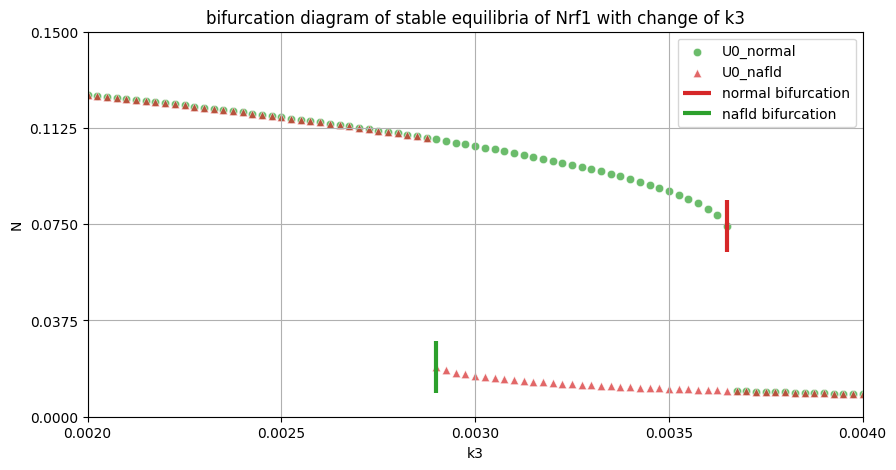

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=k3s, y=N_normal, c='tab:green', alpha=0.7, marker='o', label='U0_normal')
sns.scatterplot(x=k3s, y=N_nafld, c='tab:red', alpha=0.7, marker='^', label='U0_nafld')
normal_bf = 0.07433011169630965
plt.vlines(x=0.00365, ymin=normal_bf-0.01, ymax=normal_bf+0.01, color='tab:red', label='bifurcation to NAFLD', linewidth=3)
nafld_bf = 0.019387027310081913
plt.vlines(x=0.0029, ymin=nafld_bf-0.01, ymax=nafld_bf+0.01, color='tab:green', label='bifurcation to normal', linewidth=3)
plt.grid('on')
plt.xlim(0.0020, 0.0040)
plt.xticks([0.0020,0.0025,0.0030,0.0035,0.0040])
plt.ylim(0, 0.15)
plt.yticks([0,0.0375,0.0750,0.1125,0.15])
plt.xlabel('k3')
plt.ylabel('N')
plt.title('bifurcation diagram of stable equilibria of Nrf1 with change of k3')
plt.legend(loc='best');

**bifurcation 기준으로 초기 phenotype이 유지되는 부분만 그래프로 출력 (논문과 동일)**

In [ ]:
# (normal|NAFLD) 여부에 따라 N, m 초깃값 및 k3 탐색 범위 설정
U0_normal = [0.1,0]
U0_nafld = [0,0.1]
k3s = np.linspace(20,40,81)/10000

# 매개변수 설정 ; k3 제외
k1, k2, k4 = 0.05, 100, 3000
γ, δ = 0.33, 0.02

# 시간 범위
ts = np.linspace(0, 10000, 100000)

# N, m의 평형 값 저장
N_normal = []
m_normal = []

N_nafld = []
m_nafld = []

print('초기 normal')

for k3 in k3s:
    # 현재 k3에서 미분방정식 정의
    def nafld_ode(U, t):
        N, m = U
        dN = k1 / (1+k2*m) - γ*N
        dm = k3 / (1+k4*(N**2)) - δ*m
        return [dN, dm]

    # 미분방정식의 해
    Us_normal = odeint(nafld_ode, U0_normal, ts)

    # 현재 k3에서 두 유전자의 안정 평형 상태 확인
    N_eq, m_eq = Us_normal[-1,:]
    N_normal.append([None,N_eq][int(N_eq>m_eq)])
    m_normal.append([None,m_eq][int(N_eq>m_eq)])
    print(f'Equilibrium of k3={k3} : (N, m) = ({N_eq}, {m_eq}) >>>', ['NAFLD','normal'][int(N_eq>m_eq)])

print('\n초기 NAFLD')

for k3 in k3s:
    # 현재 k3에서 미분방정식 정의
    def nafld_ode(U, t):
        N, m = U
        dN = k1 / (1+k2*m) - γ*N
        dm = k3 / (1+k4*(N**2)) - δ*m
        return [dN, dm]

    # 미분방정식의 해
    Us_nafld = odeint(nafld_ode, U0_nafld, ts)

    # 현재 k3에서 두 유전자의 안정 평형 상태 확인
    N_eq, m_eq = Us_nafld[-1,:]
    N_nafld.append([None,N_eq][int(N_eq<m_eq)])
    m_nafld.append([None,m_eq][int(N_eq<m_eq)])
    print(f'Equilibrium of k3={k3} : (N, m) = ({N_eq}, {m_eq}) >>>', ['NAFLD','normal'][int(N_eq>m_eq)])

초기 normal
Equilibrium of k3=0.002 : (N, m) = (0.12550648046905066, 0.0020722970597932223) >>> normal
Equilibrium of k3=0.002025 : (N, m) = (0.12509921060037948, 0.0021115993288843117) >>> normal
Equilibrium of k3=0.00205 : (N, m) = (0.12468874453977895, 0.0021514698118412804) >>> normal
Equilibrium of k3=0.002075 : (N, m) = (0.12427500670430043, 0.002191924630160447) >>> normal
Equilibrium of k3=0.0021 : (N, m) = (0.12385791849658816, 0.0022329806082867863) >>> normal
Equilibrium of k3=0.002125 : (N, m) = (0.12343739813405626, 0.0022746553156120864) >>> normal
Equilibrium of k3=0.00215 : (N, m) = (0.12301336046576637, 0.002316967111659142) >>> normal
Equilibrium of k3=0.002175 : (N, m) = (0.12258571677664758, 0.0023599351946756186) >>> normal
Equilibrium of k3=0.0022 : (N, m) = (0.12215437318258142, 0.0024035797904253275) >>> normal
Equilibrium of k3=0.002225 : (N, m) = (0.12171923734274757, 0.0024479215301441743) >>> normal
Equilibrium of k3=0.00225 : (N, m) = (0.12128020434603622, 0.

In [ ]:
print(*map(len, [k3s, N_normal, m_normal, N_nafld, m_nafld]))

81 81 81 81 81


>**Nrf1**

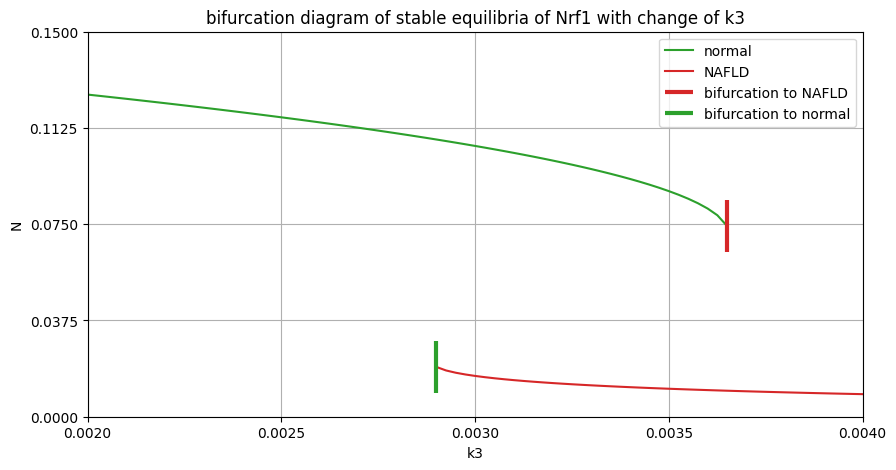

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=k3s, y=N_normal, c='tab:green', label='normal')
sns.lineplot(x=k3s, y=N_nafld, c='tab:red', label='NAFLD')
normal_bf = 0.07433011169630965
plt.vlines(x=0.00365, ymin=normal_bf-0.01, ymax=normal_bf+0.01, color='tab:red', label='bifurcation to NAFLD', linewidth=3)
nafld_bf = 0.019387027310081913
plt.vlines(x=0.0029, ymin=nafld_bf-0.01, ymax=nafld_bf+0.01, color='tab:green', label='bifurcation to normal', linewidth=3)
plt.grid('on')
plt.xlim(0.0020, 0.0040)
plt.xticks([0.0020,0.0025,0.0030,0.0035,0.0040])
plt.ylim(0, 0.15)
plt.yticks([0,0.0375,0.0750,0.1125,0.15])
plt.xlabel('k3')
plt.ylabel('N')
plt.title('bifurcation diagram of stable equilibria of Nrf1 with change of k3')
plt.legend(loc='best');

>**miR-378**

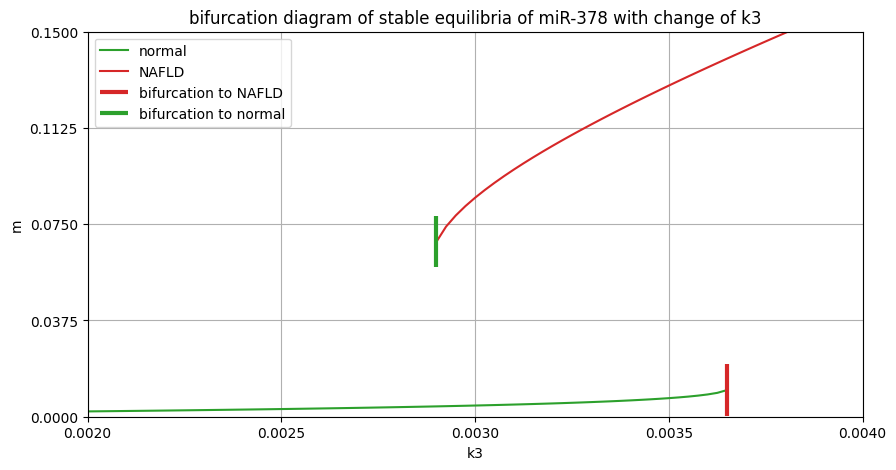

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=k3s, y=m_normal, c='tab:green', label='normal')
sns.lineplot(x=k3s, y=m_nafld, c='tab:red', label='NAFLD')
normal_bf = 0.010384090065486603
plt.vlines(x=0.00365, ymin=normal_bf-0.01, ymax=normal_bf+0.01, color='tab:red', label='bifurcation to NAFLD', linewidth=3)
nafld_bf = 0.06815285399925963
plt.vlines(x=0.0029, ymin=nafld_bf-0.01, ymax=nafld_bf+0.01, color='tab:green', label='bifurcation to normal', linewidth=3)
plt.grid('on')
plt.xlim(0.0020, 0.0040)
plt.xticks([0.0020,0.0025,0.0030,0.0035,0.0040])
plt.ylim(0, 0.15)
plt.yticks([0,0.0375,0.0750,0.1125,0.15])
plt.xlabel('k3')
plt.ylabel('m')
plt.title('bifurcation diagram of stable equilibria of miR-378 with change of k3')
plt.legend(loc='best');

(참고) k1에 대한 threshold도 위와 같은 과정을 통해 결정 가능